# Get the most out of `CausalNex` plotting

The goal of this tutorial is to help you build pretty and meaningful plots from `CausalNex` networks. 
We will help you customise your graph for your specific application, wether you seek a specific trend in the network or you wish to use the plotting in a presentation or article.

We will go through the following items:

- Explore customisations available in `CausalNex`:
    - A huge number of customisations is possible, which can make the existent documentation overwhelming.
    - With examples, we show the main customisations available, and give tips of meaningful choices.
    
- Understand `Graphviz`, the engine used in `CausalNex` visualisations:
    - `CausalNex` renders visualisation by interacting with a software called `Graphviz` (https://www.graphviz.org/).
    - We explain the basics of this software and how this interaction takes place.

- Explore alternative solutions:
    - We exemplify how to use `networkx` for plotting. This may be a friendly alternative, as it uses matplotlib to render the images.


## Install `Graphviz`

`CausalNex` visualisations will only work if you have `Graphviz` installed, which you can obtain here:  https://www.graphviz.org/download/


## Explore customisations available in `CausalNex`

In this tutorial, we work with the following Bayesian Network structure, known as "Insurance network". This network was first introduced in 
[1](./plotting_tutorial.html#References).

Note that we create random weights for each edges. These could mean, in a real model, any indicative of the edge strength, such as the weights output by NOTEARS.

In [2]:
import numpy as np
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure
from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")

from itertools import chain

edges = [
    ("Age", "SocioEcon", {"weight": 0.37}),
    ("SocioEcon", "OtherCar", {"weight": 0.95}),
    ("SocioEcon", "GoodStudent", {"weight": 0.73}),
    ("Age", "GoodStudent", {"weight": 0.6}),
    ("SocioEcon", "RiskAversion", {"weight": 0.16}),
    ("Age", "RiskAversion", {"weight": 0.16}),
    ("RiskAversion", "VehicleYear", {"weight": 0.06}),
    ("SocioEcon", "VehicleYear", {"weight": 0.87}),
    ("Accident", "ThisCarDam", {"weight": 0.6}),
    ("RuggedAuto", "ThisCarDam", {"weight": 0.71}),
    ("MakeModel", "RuggedAuto", {"weight": 0.02}),
    ("VehicleYear", "RuggedAuto", {"weight": 0.97}),
    ("Mileage", "Accident", {"weight": 0.83}),
    ("DrivQuality", "Accident", {"weight": 0.21}),
    ("Antilock", "Accident", {"weight": 0.18}),
    ("RiskAversion", "MakeModel", {"weight": 0.18}),
    ("SocioEcon", "MakeModel", {"weight": 0.3}),
    ("RiskAversion", "DrivQuality", {"weight": 0.52}),
    ("DrivingSkill", "DrivQuality", {"weight": 0.43}),
    ("MakeModel", "Antilock", {"weight": 0.29}),
    ("VehicleYear", "Antilock", {"weight": 0.61}),
    ("SeniorTrain", "DrivingSkill", {"weight": 0.14}),
    ("Age", "DrivingSkill", {"weight": 0.29}),
    ("RiskAversion", "SeniorTrain", {"weight": 0.37}),
    ("Age", "SeniorTrain", {"weight": 0.46}),
    ("Theft", "ThisCarCost", {"weight": 0.79}),
    ("CarValue", "ThisCarCost", {"weight": 0.2}),
    ("ThisCarDam", "ThisCarCost", {"weight": 0.51}),
    ("HomeBase", "Theft", {"weight": 0.59}),
    ("AntiTheft", "Theft", {"weight": 0.05}),
    ("CarValue", "Theft", {"weight": 0.61}),
    ("Mileage", "CarValue", {"weight": 0.17}),
    ("MakeModel", "CarValue", {"weight": 0.07}),
    ("VehicleYear", "CarValue", {"weight": 0.95}),
    ("RiskAversion", "HomeBase", {"weight": 0.97}),
    ("SocioEcon", "HomeBase", {"weight": 0.81}),
    ("RiskAversion", "AntiTheft", {"weight": 0.3}),
    ("SocioEcon", "AntiTheft", {"weight": 0.1}),
    ("OtherCarCost", "PropCost", {"weight": 0.68}),
    ("ThisCarCost", "PropCost", {"weight": 0.44}),
    ("Accident", "OtherCarCost", {"weight": 0.12}),
    ("RuggedAuto", "OtherCarCost", {"weight": 0.5}),
    ("Accident", "MedCost", {"weight": 0.03}),
    ("Cushioning", "MedCost", {"weight": 0.91}),
    ("Age", "MedCost", {"weight": 0.26}),
]
g = StructureModel(edges)

We will build, in this tutorial, the following plot for this Bayesian Network:
![final network](supporting_files/final_insurance_model.jpg)

The customisations in the figure above include:

- We order nodes vertically, according to the causality hierarchy
- The edge thickness is proportional to the weight value assigned to the edge
- The figure dimensions obey a standard presentation slide proportions (16:9)
- Color target variables differently from other variables
- Custom node shapes and title

The representation above makes this graph easier to work with than the out-the-box `CausalNex` visualisation (shown below).

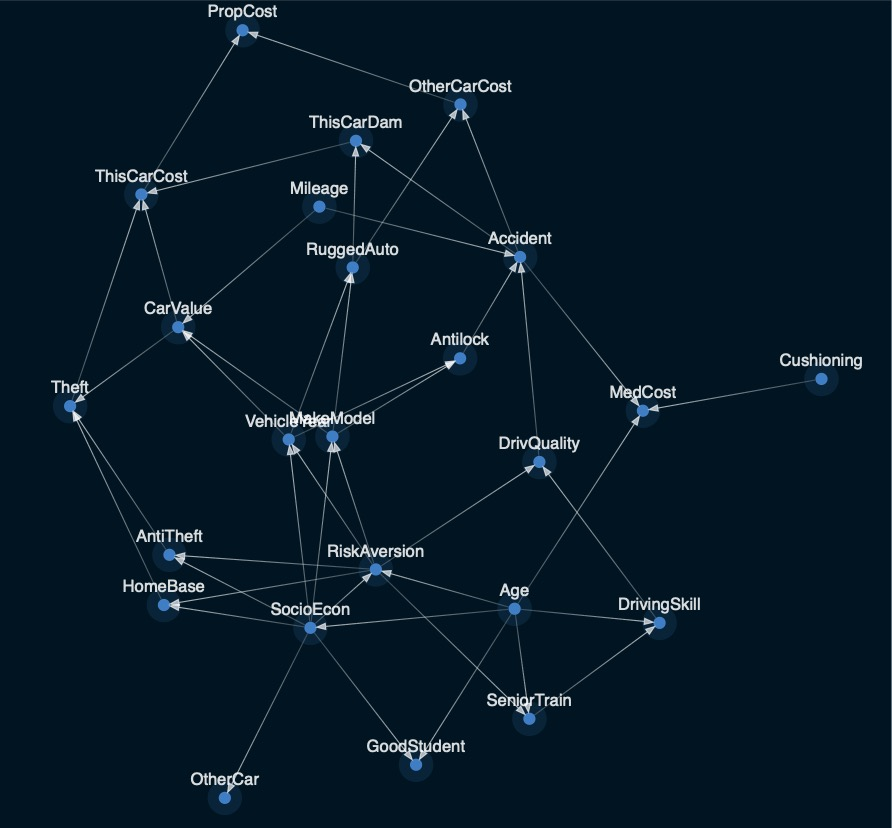

In [3]:
viz = plot_structure(g)  # Default CausalNex visualisation
image_binary = viz.draw(format="jpg")
Image(image_binary)

### Choosing a `layout`
One major change we can make is the **layout** of the plot. The layout determines how nodes are distributed in the image. In order to choose a layout, we simply add the argument `prog="..."`  to the `draw` method.

N.B.:

- Deciding on the layout is usually the first change we make when customising a visualisation. This is because some of the graph attributes, which we will soon see, only work for certain specific layouts.
- The default layout is `neato`. It finds the node positions by modelling the edges as mechanical springs. Final layout is the equilibrium state.


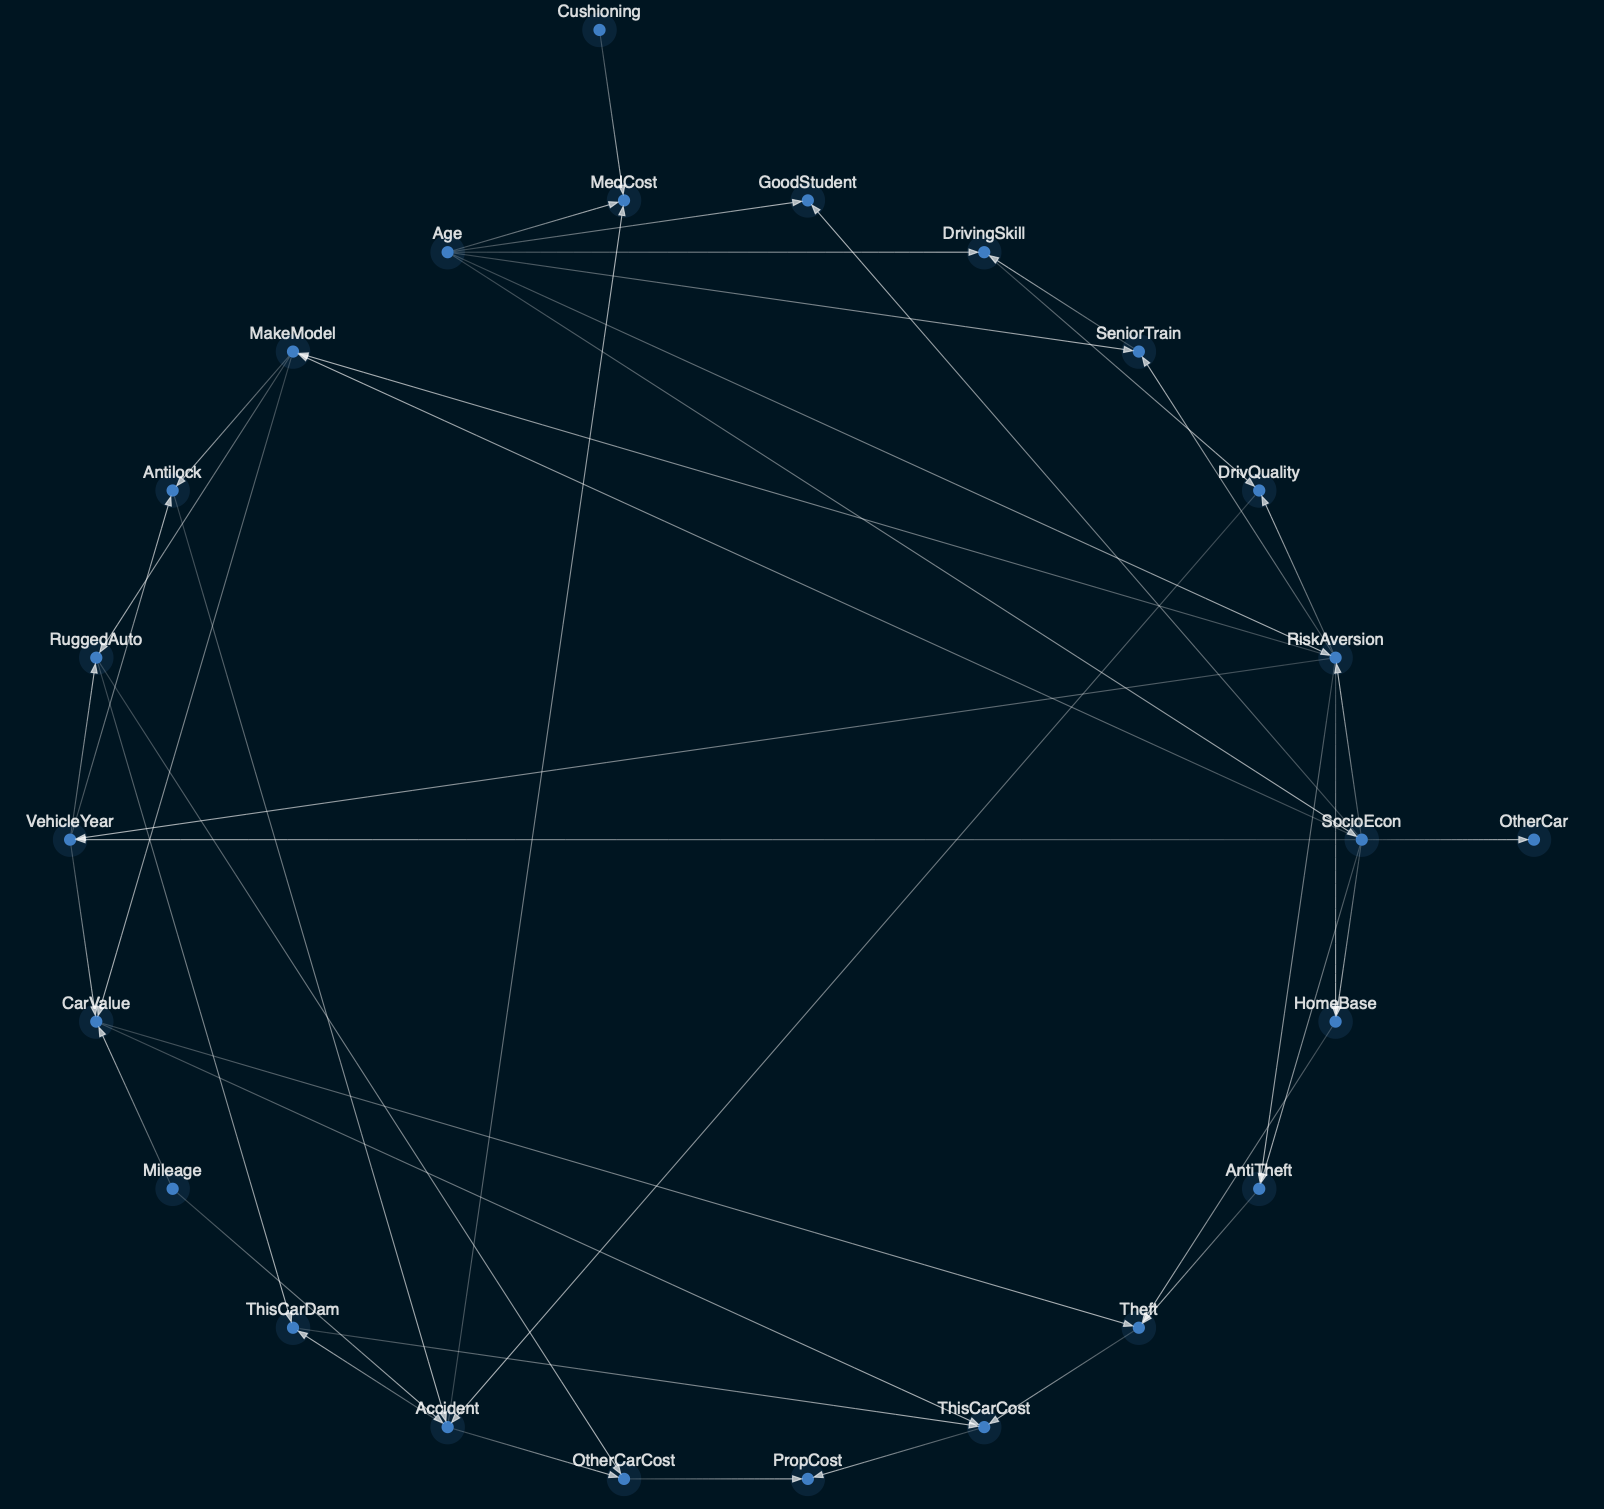

In [4]:
Image(viz.draw(
    format="png", prog="circo"  # `circo` produces a circular layout
),width=500)


The layouts available are: 
`dot`, `neato`, `fdp`, `sfdp`, `twopi` and `circo`.
A detailed description of each method can be found in the website www.graphviz.org/ ( `Graphviz` is the visualisation software used by `CausalNex` to create plots). 

We examplify how the different of layouts look like. We simulate a tree model to do so.

dot: Order nodes hierarchly. Great to spot the dependencies of a causal network.


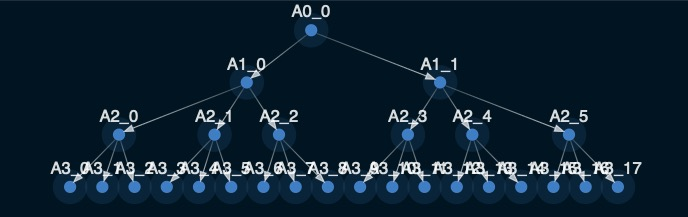

neato: Spring model. Great default tool if the graph is not too large


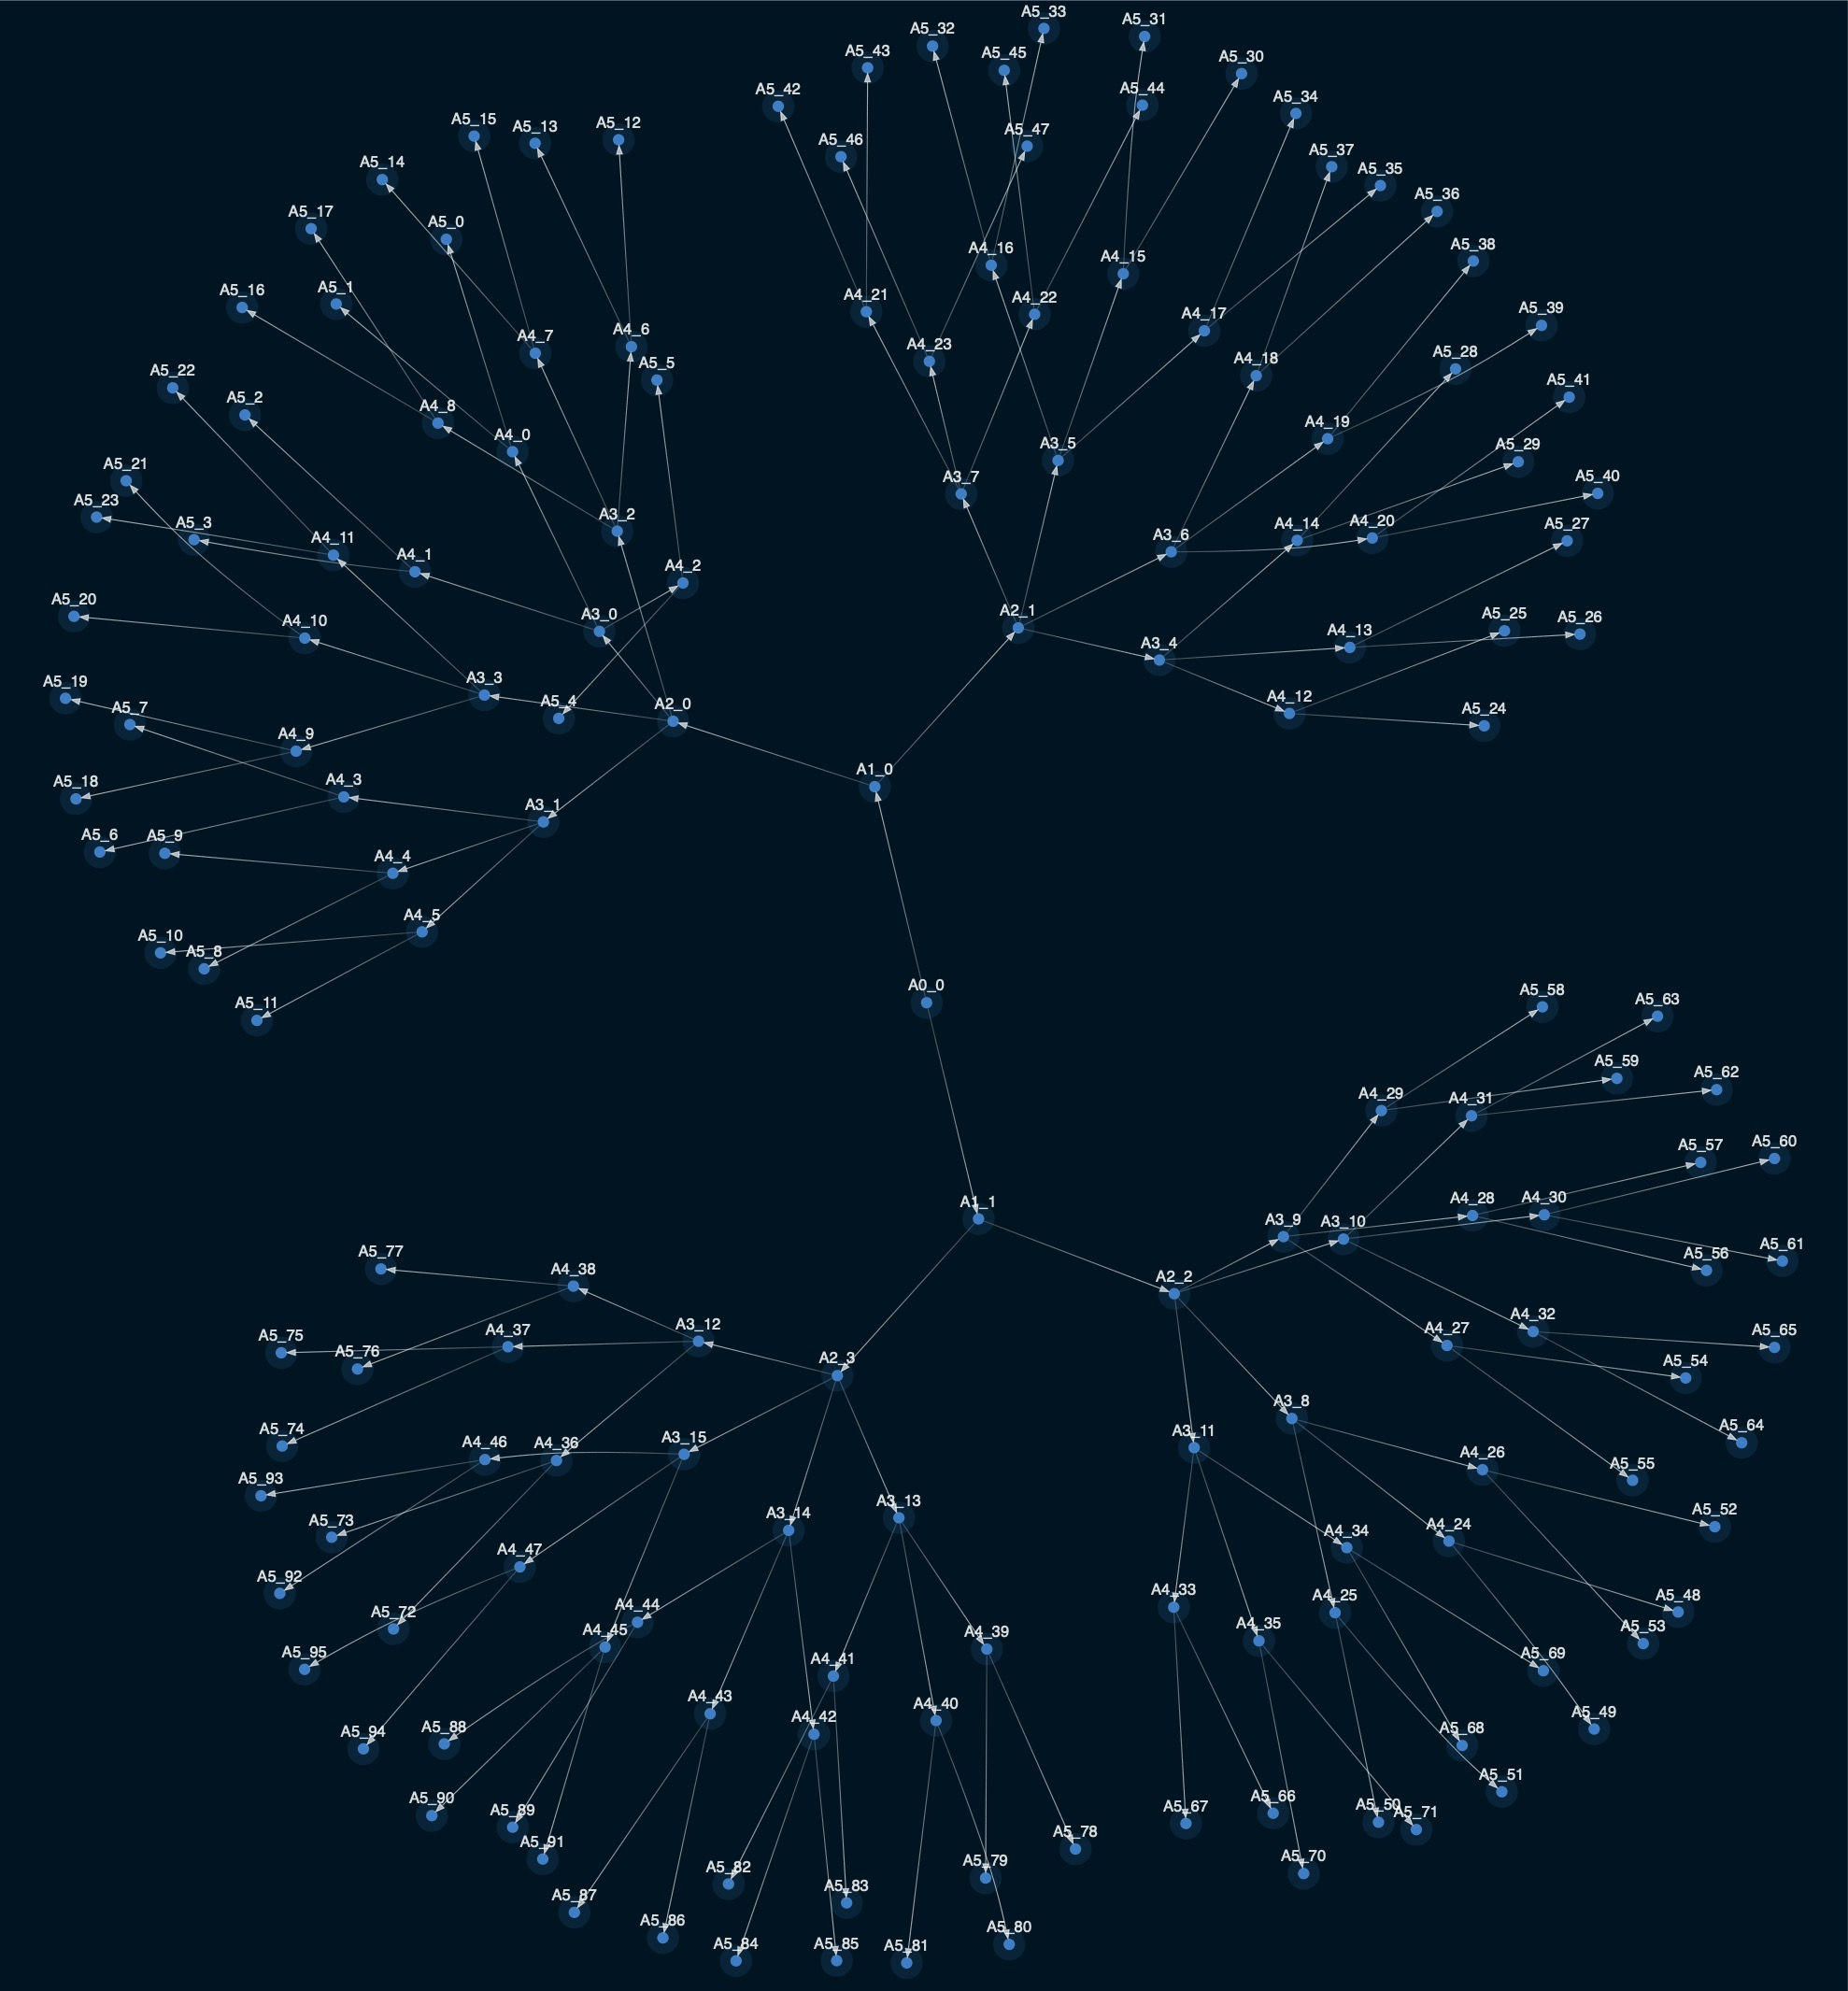

sfdp: A different style of spring model


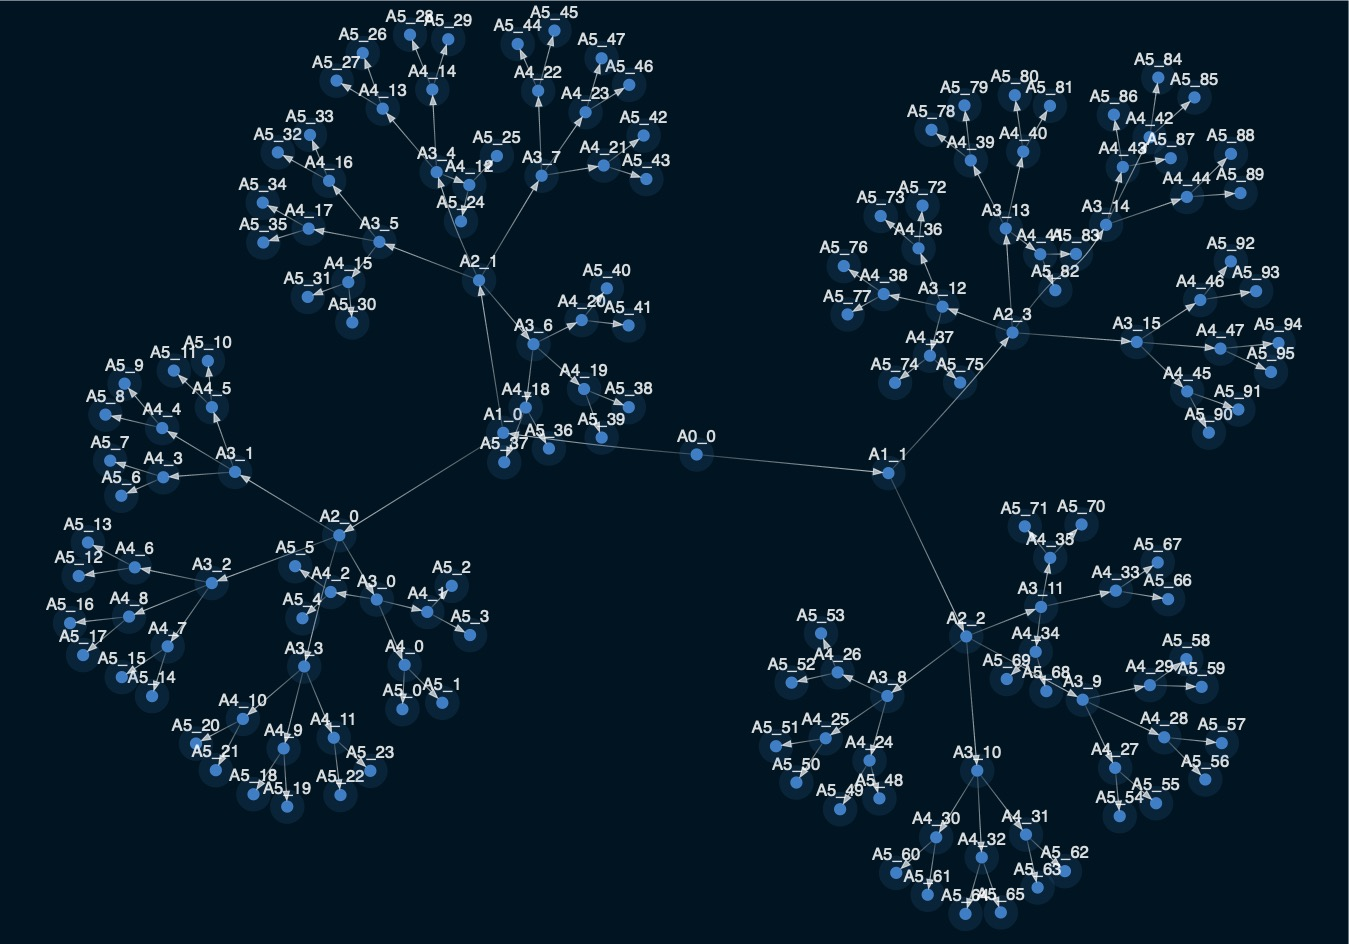

twopi: Radial layout


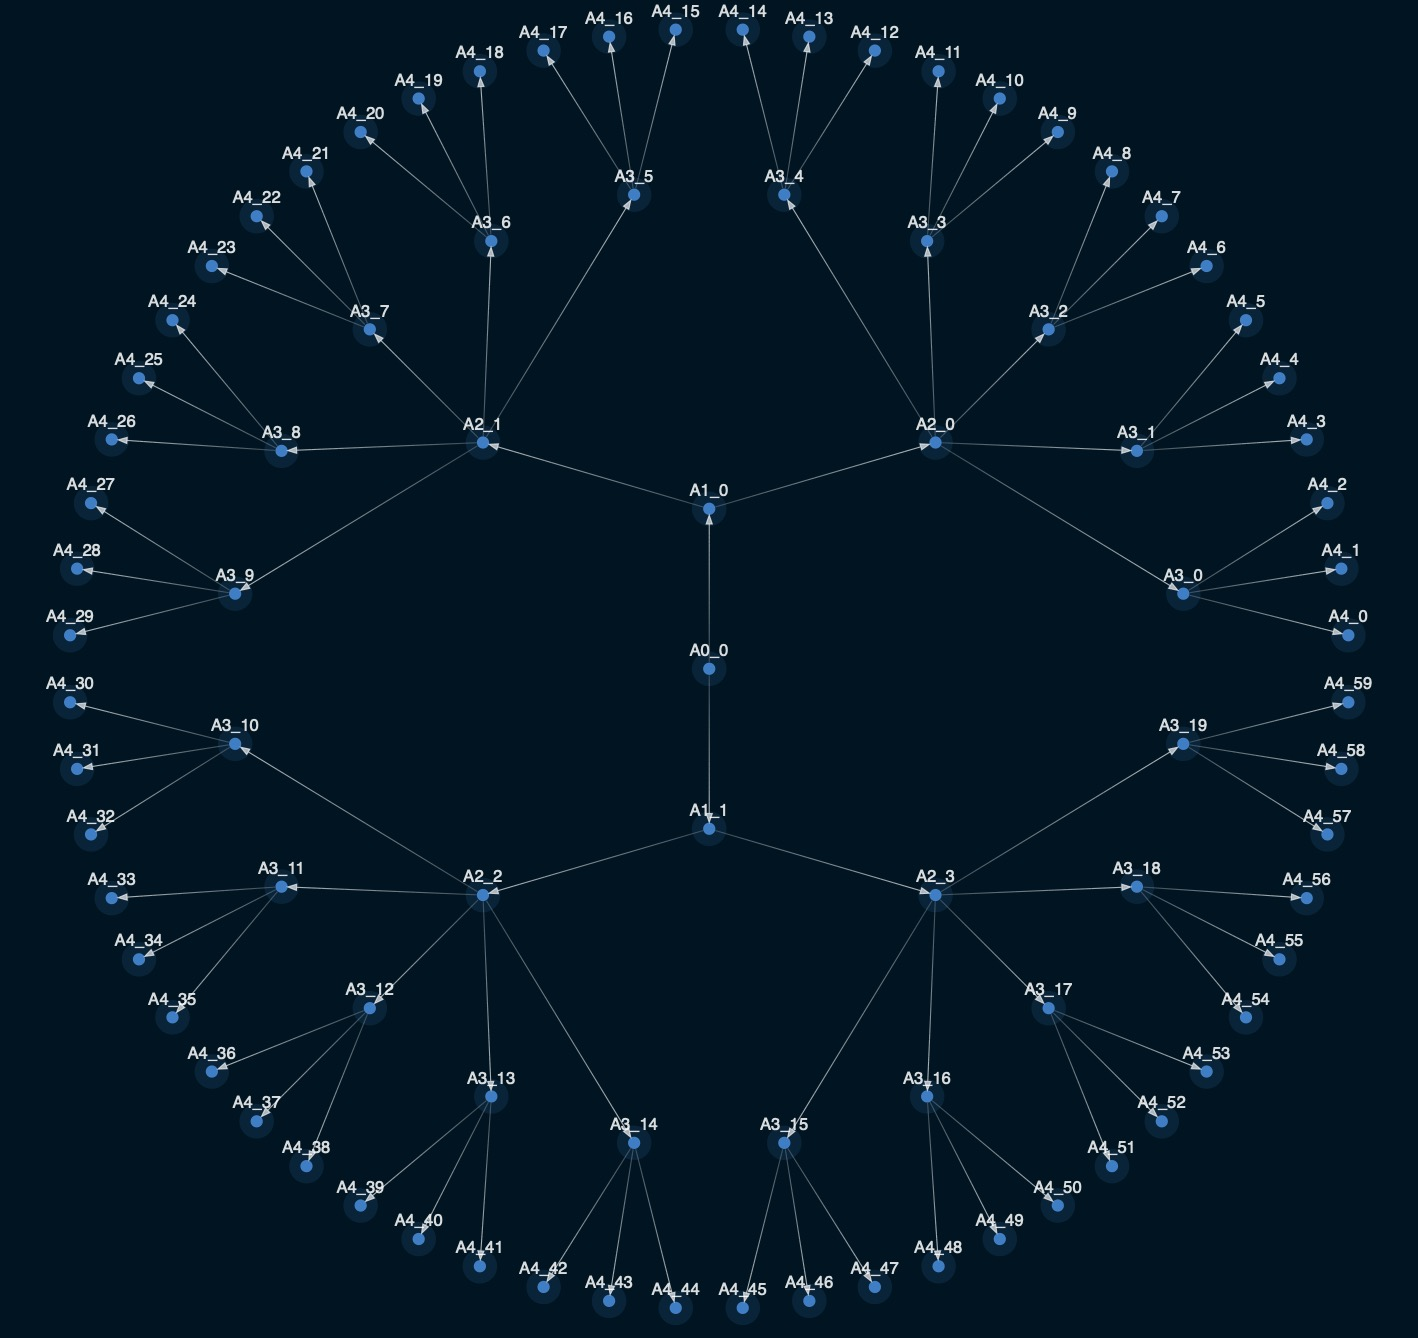

In [5]:
def get_tree(k_list):
    """
    Return the edges of a tree given the number of children at each level
    """
    n = 1
    edges_radial = []
    for level in range(0, len(k_list)):
        k = k_list[level]
        edges_radial.extend(
            [(f"A{level}_{i // k}", f"A{level + 1}_{i}") for i in range(k * n)]
        )
        n = k * n
    return edges_radial


layouts = [
    ("dot","Order nodes hierarchly. Great to spot the dependencies of a causal network.",[2, 3, 3]),
    ("neato", "Spring model. Great default tool if the graph is not too large", [2, 2, 4, 3, 2]),
    ("sfdp", "A different style of spring model", [2, 2, 4, 3, 2]),
    ("twopi", "Radial layout", [2, 2, 5, 3]),
]

for layout, description, k_list in layouts:
    g_tree = StructureModel(get_tree(k_list))
    viz = plot_structure(g_tree)

    print(f"{layout}: {description}")
    image_binary = viz.draw(format="jpg", prog=layout)
    display(Image(image_binary, width=500))


In this tutorial, we will use the `dot` layout.

The following is the default result if we use `dot`. We can see that we have an idea of the dependencies, but the curved edges can be very confusing. 
We also see overlaps between labels, and this also should be corrected.

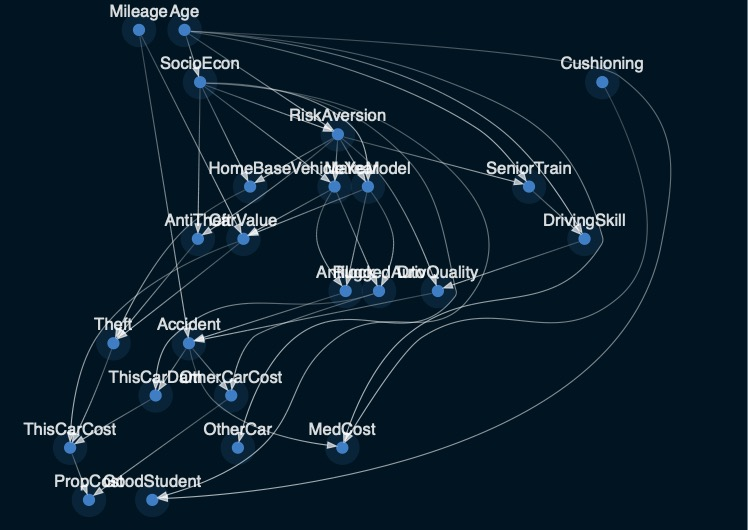

In [6]:
viz = plot_structure(g, prog="dot")
Image(viz.draw(format="jpg"))

### How to customise your layout

In order to change properties of this plot, we pass  graph, nodes and edges attributes. Attributes include the title of the graph, the color or shape of node and the thickness of an edge.

- Graph attributes are passed as a dicionary `{attribute : value}`.
- Node attributes are of the form `{node: {attribute : value}}`, i.e., for each node, we pass a dictionary of attributes
- Edge attibutes are of the form `{(node_from, node_to): {attribute:value}}`.
- The full list of attributres you can set is: https://www.graphviz.org/doc/info/attrs.html . Since this is an extensive list we list in the table below the main attributes and their meaning. 

A list of useful node, graph and edge attributes is below:

#### Main Graph Attributes


<table>
<th>Attribute</th>
<th>Description</th>
<th>values</th>
<tr>
<td>`rankdir`</td>
<td>Changes the direction of the hierarchy. By default, nodes are put from top to bottom, according to their rank.

Only works for the `dot` layout.</td>
<td>- `"LR"` (Left to Right),
- `"TB"` (Top to Bottom),
- `"RL"` or
- `"BT"` </td>
</tr>
<tr>
<td>`ranksep`</td>
<td>Distance between ranks. 

Only works for the `dot` and `twopi` layouts.

The suffix `"equally"` makes this distance to be uniform.</td>
<td>`double` or `string`. Examples:

- `1.2`
- `"1.2 equally"`</td>
</tr>
<tr>
<td>`nodesep`</td>
<td>The minimum space between two adjacent nodes in the same rank.

Only works for the `dot` layout.</td>
<td>`double`</td>
</tr>
<tr>
<td>`Ordering`</td>
<td>Only works for the `dot` layout. 

By changing the edge order, we can have some control over the position of the nodes in the visualization. 
See https://www.graphviz.org/doc/info/attrs.html#d:ordering for precise explanation 
with this attibute.</td>
<td>`"in"` or `"out"`</td>
</tr>
<tr>
<td>`Damping, K`</td>
<td>Parameters used by spring models to compute the node positions
check https://www.graphviz.org/doc/info/attrs.html#d:Damping for details.</td>
<td>`double`</td>
</tr>
<tr>
<td>`splines`</td>
<td>`Graphviz` tries to "curve" the edges to contour nodes, in order to avoid edges overlapping with some nodes. We choose the type of curve it is uses.

A visual example can be found in https://www.graphviz.org/doc/info/attrs.html#d:splines</td>
<td>- `"line"` - All edges will be STRAIGHT LINES
- `"spline"` - Use splines
- Others values are: `"polynine"`, `"curved"`, `"ortho"`
</td>
</tr>
<tr>
<td>`bgcolor`</td>
<td>Background graph colour.</td>
<td>"RGB	HSV or colour name (`black`, `blue`...)"

`"transparent"` indicates that there is no background color set.</td>
</tr>
<tr>
<td>`label`</td>
<td>A label for the overall graph.</td>
<td>`"string"`</td>
</tr>
<tr>
<td>`fontcolor`</td>
<td>Colour for the graph label (does not propagates to nodes).</td>
<td>RGB	HSV or colour name (`black`, `blue`...)</td>
</tr>
<tr>
<td>`fontname`</td>
<td>Font name for the graph label.</td>
<td>`"string"`</td>
</tr>
<tr>
<td>`fontsize`</td>
<td>Size for the graph label.</td>
<td>`double`</td>
</tr>
<tr>
<td>`labelloc`</td>
<td>Sets the position of the label vertically.</td>
<td>`"t"` or `"b"` (top, bottom)</td>
</tr>
<tr>
<td>`labeljust`</td>
<td>Sets the position of the label horizontally.</td>
<td> `"l"`, `"r"`, `"c"` (left right center)</td>
</tr>
<tr>
<td>`dpi`</td>
<td>Resolution of image.</td>
<td>`double`</td>
</tr>
<tr>
<td>`scale`</td>
<td>Scales all graph attributes up or down.

Does not work with `dot`.</td>
<td>`double`</td>
</tr>
<tr>
<td>`pad`</td>
<td>Sets a margin in the figure. This margin is exterior to the size of the figure.</td>
<td>`string` with 2 values, e.g. `"1.3,0.8"`</td>
</tr>
<tr>
<td>`size`</td>
<td>Sets the dimensions of the figure.

TO MAKE IT WORK AS EXPECTED, add the attribute `"ratio=fill"` to the graph.
This sets the dimensions INSIDE the `pad`, so the final size is: `size + pad` value.</td>
<td>`string` with 2 values, e.g. `"16,9"`</td>
</tr>
<tr>
<td>`ratio`</td>
<td>If numeric value is provided, it sets the ratio between width and height of the figure. Other options available, in which we pass a string as input.

See the other options here https://www.graphviz.org/doc/info/attrs.html#d:ratio</td>
<td>Numeric value or `string` (`"fill"`, `"compress"`, `"expand"`, `"auto"`) or not specified</td>
</tr>
<tr>
<td>`overlap`</td>
<td>Resolves overlaps between nodes.

Does not work with `dot`.</td>
<td>- `"true"` to retain overlaps
- `"false"` or prism uses prism algorithm</td>
</tr>
</table>


#### Main Edge Attributes

<table>
<th>Attribute</th>
<th>Description</th>
<th>values</th>
<tr>
<td>`penwidth`</td>
<td>Width of that specific edge.</td>
<td>`double`</td>
</tr>
<tr>
<td>`weight`</td>
<td>It is a way to indirectly control the edge size. A larger weight encourages the layout to make the edge length 
Weights in dot must be integers.
For `dot`, larger values makes the edge shorter.

See 
https://www.graphviz.org/doc/info/attrs.html#d:weight for details</td>
<td>`double`</td>
</tr>
<tr>
<td>`label`</td>
<td>Edge label, optional.</td>
<td>`string`</td>
</tr>
<tr>
<td>`fontcolor`, `fontsize`, `fontlabel`</td>
<td>Same as for graphs; affects the edge label.</td>
<td>--</td>
</tr>
<tr>
<td>`color`</td>
<td>Colour of the edge (not its label).</td>
<td>RGB	HSV or colour name (`black`, `blue`...)</td>
</tr>
<tr>
<td>`constraint`</td>
<td>Works for `dot` only.

If `false`, the edge is not used in ranking the nodes. As a result, child and parent may be in the same ranking level. A visual example is in https://www.graphviz.org/doc/info/attrs.html#d:constraint </td>
<td>`"true"` or `"false"`</td>
</tr>
<tr>
<td>`arrowhead`</td>
<td>Style of `arrowhead`. Check https://www.graphviz.org/doc/info/attrs.html#k:arrowType To see all types available</td>
<td>`string`. E.g.: `"open"`, `"vee"`, `"diamond"`...</td>
</tr>
<tr>
<td>`arrowsize`</td>
<td>Proportion of size of head relative to `penwidth`</td>
<td>`double`</td>
</tr>
</table>


#### Main Node Attributes

<table>
<th>Attribute</th>
<th>Description</th>
<th>Values</th>
<tr>
<td>`pos`</td>
<td>Controls the position of a specific node.

For `dot`: it has NO EFFECT</td>
<td>- `"x,y"` for setting the node's initial position to (x,y). This position is modified until the convergence of the algorithm
- `"x,y!"` to totally fix the position of the node at (x,y)</td>
</tr>
<tr>
<td>`shape`</td>
<td>The shape of the node, a variaty of choices is available.

Check https://www.graphviz.org/doc/info/shapes.html#polygon</td>
<td>`string`</td>
</tr>
<tr>
<td>`image`</td>
<td>Upload an image to be used as a node.

N.B.: Use the attributes `imagescale`, and `imagepos` to have more control over the image in the node. See https://www.graphviz.org/doc/info/attrs.html#d:imagepos</td>
<td>Path to the image</td>
</tr>
<tr>
<td>`style`</td>
<td>Information about the node style, whether it is filled, the border is dashed…

Check https://www.graphviz.org/doc/info/attrs.html#k:style</td>
<td>One of: `solid`, `dashed`, `dotted`, `bold`, `rounded`, `diagonals`, `filled`, `striped`, `wedged`</td>
</tr>
<tr>
<td>`fixedsize`</td>
<td>If false, the node width and height will be changed so that the label fits inside the node. If true, width and height attributes control this completely.

Check https://www.graphviz.org/doc/info/attrs.html#d:fixedsize for details</td>
<td>`"true"` or `"false"`</td>
</tr>
<tr>
<td>`width`</td>
<td>Width of node. 

If `fixedsize` is `false`, this is the minimal width.</td>
<td>`double`</td>
</tr>
<tr>
<td>`height`</td>
<td>Height of node. 
If fixed size is false, this is the minimal height.</td>
<td>`double`</td>
</tr>
<tr>
<td>`regular`</td>
<td>If regular is true, width and height are set to the same value.</td>
<td>`"true"` or `"false"`</td>
</tr>
<tr>
<td>`penwidth`</td>
<td>Specifies the width of the pen, in points, used to the boundaries of node.</td>
<td>`double`</td>
</tr>
<tr>
<td>`color`</td>
<td>Colour the node boundary. Check https://graphviz.gitlab.io/_pages/doc/info/colors.html to see all options</td>
<td>RGB, HSV or colour name (`black`, `blue`, `red`...)</td>
</tr>
<tr>
<td>`fillcolor`</td>
<td>Colour inside the node.</td>
<td>RGB, HSV or colour name (`black`, `blue`, `red`...)</td>
</tr>
<tr>
<td>`label`</td>
<td>Label for the node. If not specified, the node name is used as label. 

N.B.: We can write rich text by writing the node in HTML. The guide to do so is here https://www.graphviz.org/doc/info/shapes.html#html</td>
<td>`string`</td>
</tr>
<tr>
<td>`labelloc`</td>
<td>Label position inside the node: bottom, top or centre.</td>
<td>`b`, `t` or `c`</td>
</tr>
<tr>
<td>`fontcolor, fontsize, fontlabel`</td>
<td>Same as for graphs; affects the node label.</td>
<td></td>
</tr>
</table>


#### Example of changing parameters

As an example of how much of the visualisation can be customised, we use almost almost all the attributes from the table above to modify the visualisation. The result is purposely not pleasing, but shows how to obtain a very high level of control over the image.

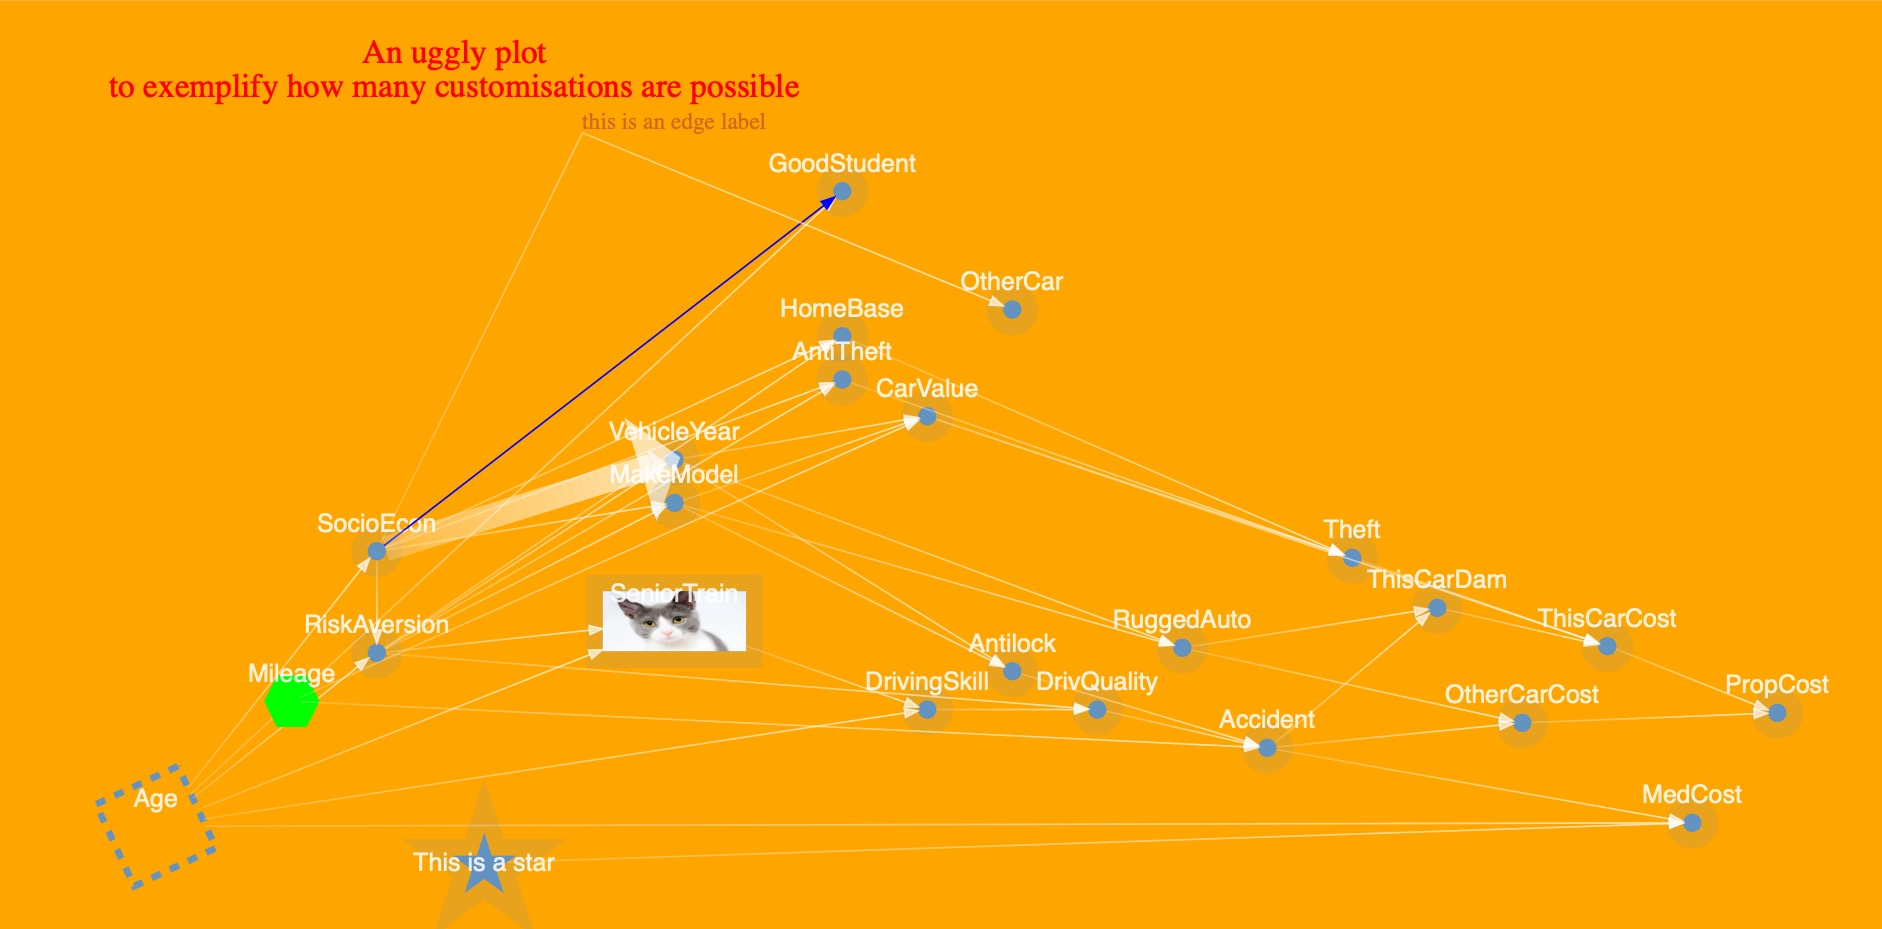

In [7]:
graph_attributes = {
    "rankdir": "LR",  # Change ranking direction to be horizontal
    "splines": "false",  # Do not curve edges, use straight lines instead
    "bgcolor": "orange",  # background color
    "label": "An uggly plot\nto exemplify how many customisations are possible",
    "fontcolor": "red",  # Setting label font
    "fontname": "Times",  # Setting label font settings
    "fontsize": 20,  # Setting LABEL font settings
    "pad": "0.8,0.3",  # setting a margin
    "dpi": 120,  # resolution
    "labeljust": "l",  # This sets the title to be at the left
    "labelloc": "t",  # This sets the title to be at the top
    "nodesep": 0.2,  # separation between nodes with same rank
    "ranksep": 1.1,  # This changes the distances between rank levels in hierarchy (For Dot and twopi only )
}

# Changing attributes of specific nodes
node_attributes = {
    "Age": {  # We change the attributes of the node "Age"
        "shape": "square",
        "style": "dashed",
        "width": 1,
        "penwidth": "4",  # Thickness of the boundary
        "color": "#4a90e2d9",
        "orientation": 25,  # rotate node
    },
    "Mileage": {
        "shape": "hexagon",
        "regular": "true",  # forces the polygon to be regular
        "color": "green",
    },
    "Cushioning": {
        "shape": "star",
        "label": "This is a star",  # Label overwrites the default nae
    },
    "SeniorTrain": {
        "image": "./supporting_files/cat.jpeg",  # we can upload local images inside a node
        "width": 1.2,
        "shape": "dot",  # choose node to be a dot, so that the image is larger than the node
    },
}

# Changing attributes of specific edges
edge_attributes = {
    ("SocioEcon", "OtherCar"): {
        "label": "this is an edge label",  # Edges can have labels
        "fontcolor": "chocolate",  # setting the label color
    },
    ("SocioEcon", "GoodStudent"): {"color": "blue"},
    ("SocioEcon", "RiskAversion"): {
        "constraint": "false"
    },  # edge not used for ranking, both extremities are on same level
    ("SocioEcon", "VehicleYear"): {"penwidth": 15},  # Thickness of edge
}


viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
display(Image(viz.draw(format="jpg")))

#### Optimising the network design
The next step is to use all this costumisation power to actually make the visualisation more appealing and meaningful. The result could easily be used in applications such as presentations or papers, with only minor post processing, if any.

Among the customisations made in the plot below, we emphasise the follwoing:

- Color target variables differently from other nodes
- Use edge weights (or any meaningful quantitative value related to an edge) to set the thickness of an edge.
- Choose wisely the layout (in this case dot) that suits your application, and the parameters to allocate the nodes


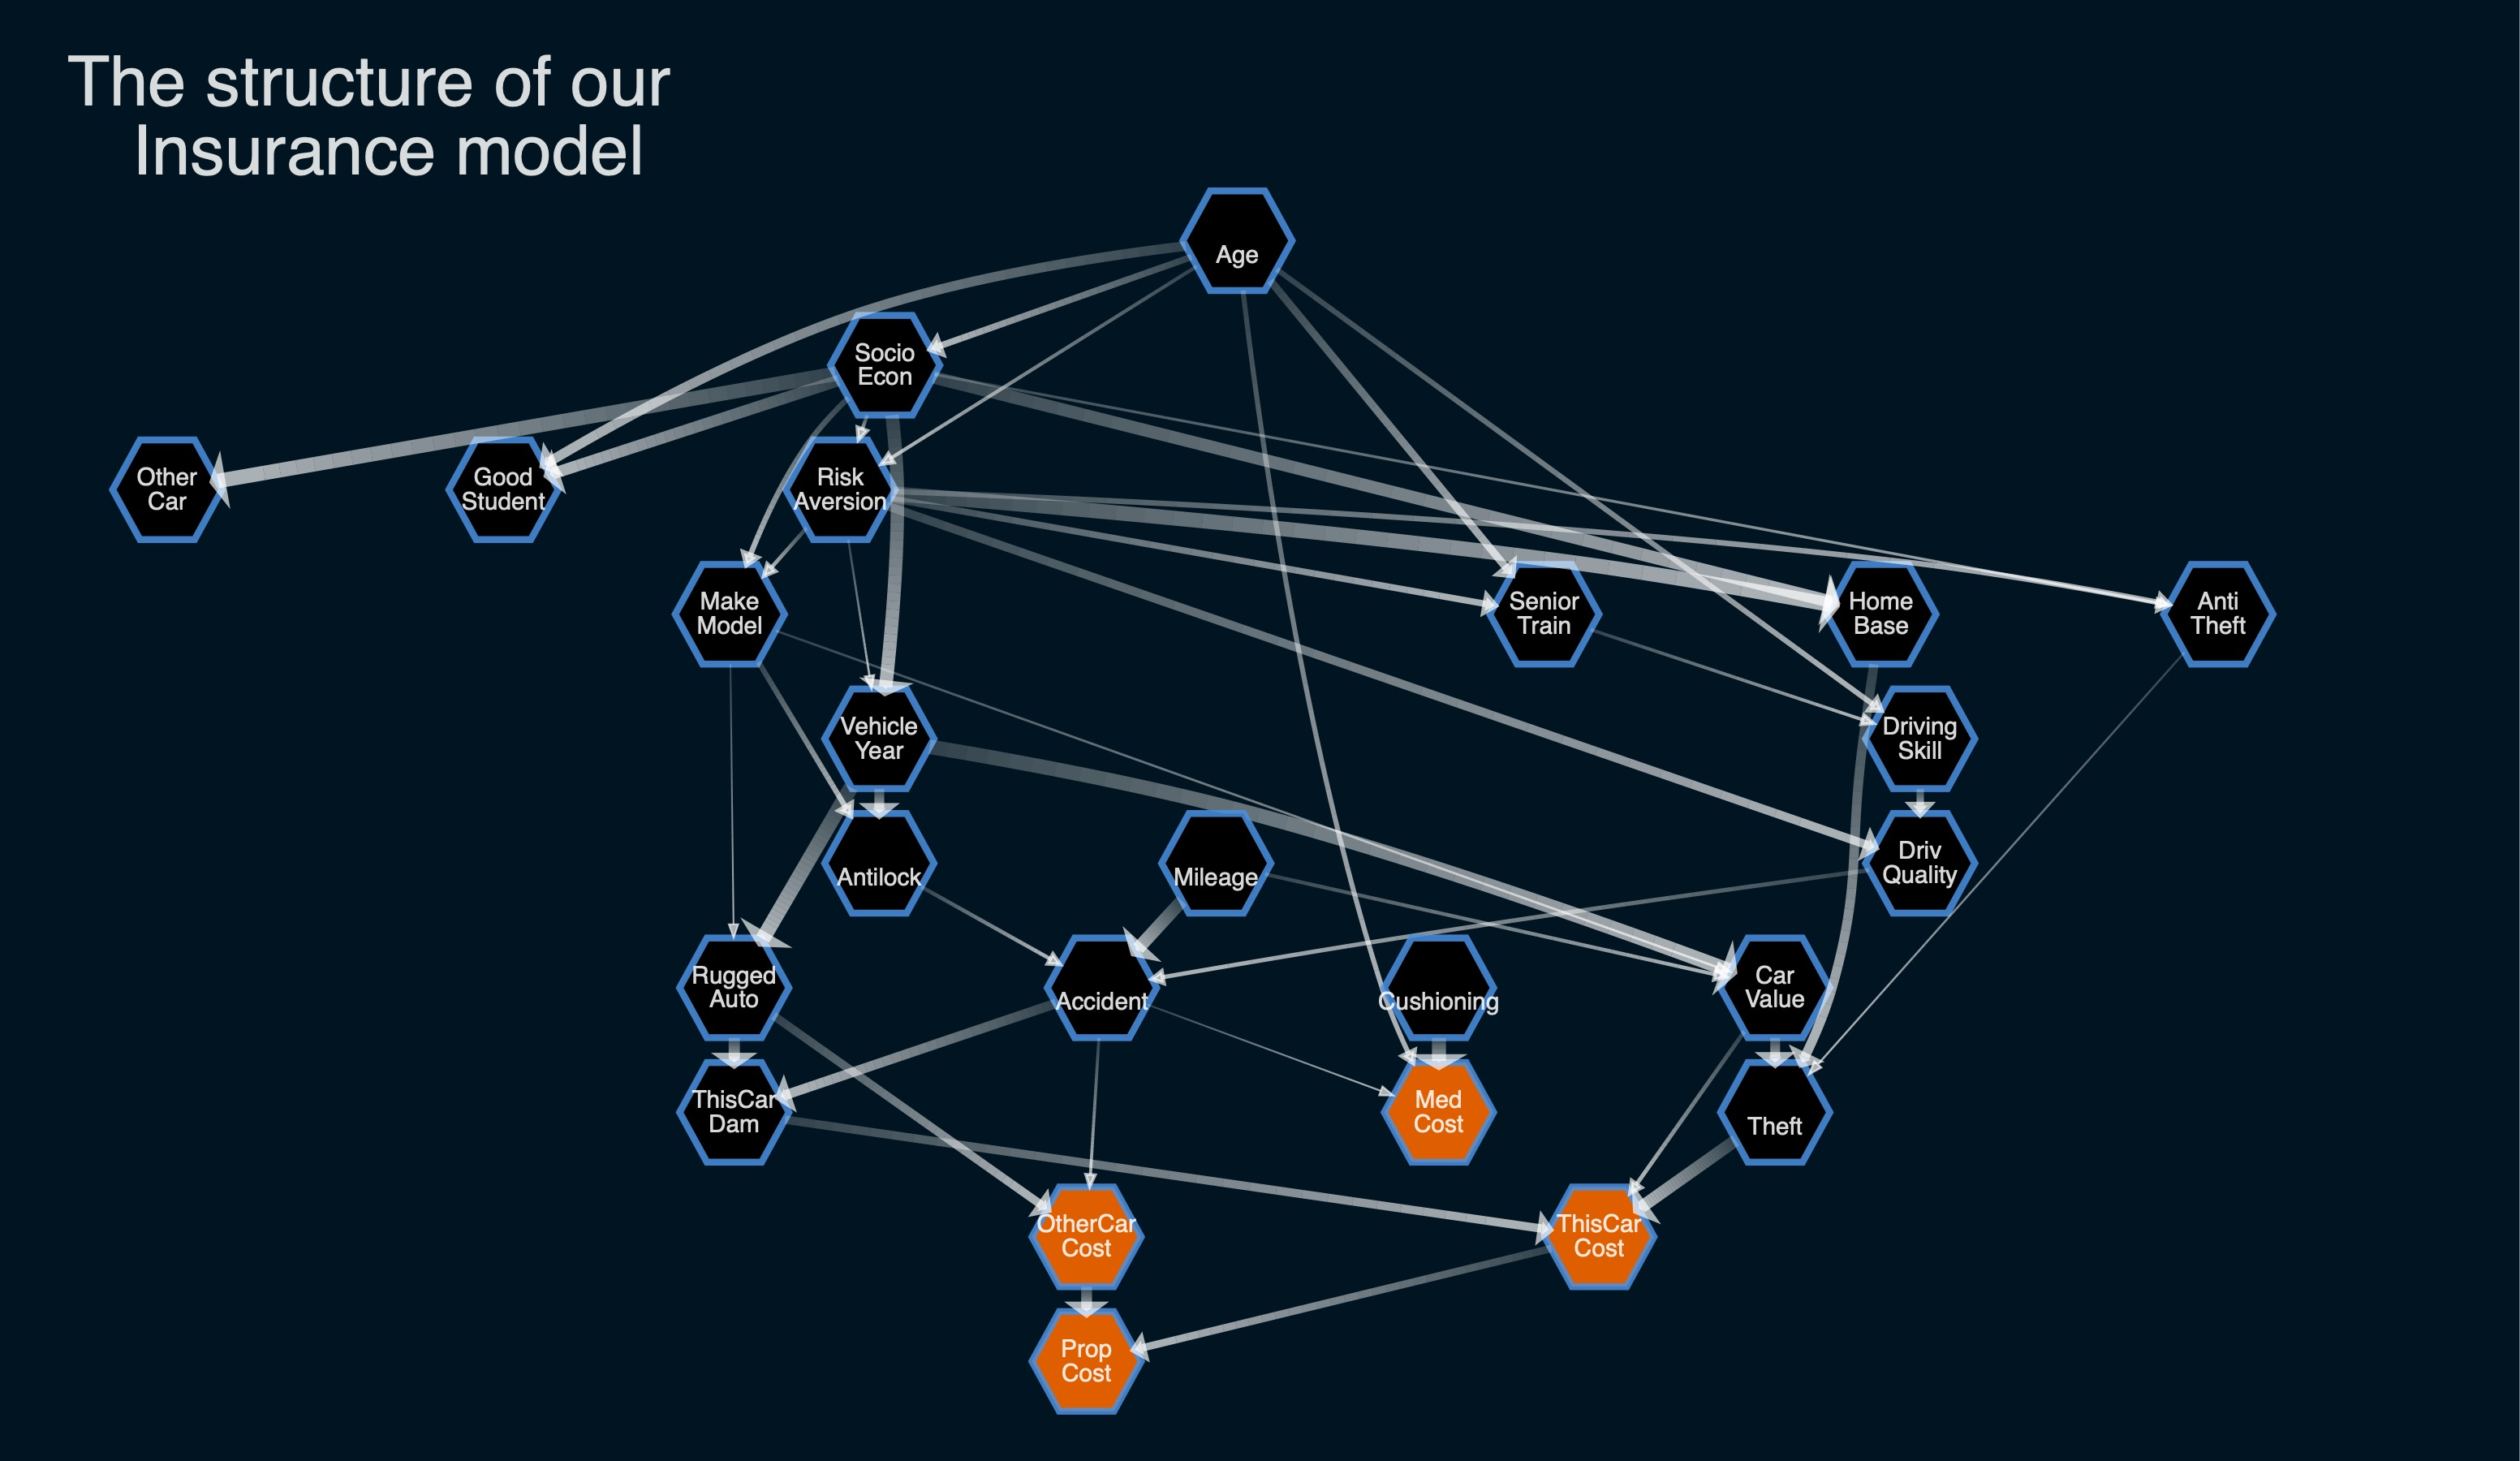

In [8]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "The structure of our\n \t Insurance model",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 2.2,
        "height": 2,
        "fillcolor": "#000000",
        "penwidth": "10",
        "color": "#4a90e2d9",
        "fontsize": 35,
        "labelloc": "c",
    }
    for node in g.nodes
}

# Splitting two words with "\n"
for node in g.nodes:
    up_idx = [i for i, c in enumerate(node) if c.isupper()][-1]
    node_attributes[node]["label"] = node[:up_idx] + "\n" + node[up_idx:]

# Target nodes (ones with "Cost" in the name) are colored differently
for node in g.nodes:
    if "Cost" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

# Customising edges
edge_attributes = {
    (u, v): {
        "penwidth": w * 20 + 2,  # Setting edge thickness
        "weight": int(5 * w),  # Higher "weight"s mean shorter edges
        "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
    }
    for u, v, w in g.edges(data="weight")
}


viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
f = "supporting_files/final_insurance_model.jpg"
viz.draw(f)
Image(f)

If fixing the image size is not a requirement, we obtain the following image.

In [9]:
# Remove attributes fixing the size of figure
del graph_attributes["size"]
del graph_attributes["ratio"]

# minor changes on distancing
graph_attributes["nodesep"] = 2
graph_attributes["ranksep"] = "1.1 equally"
graph_attributes["label"] = "This is the structure if size is\nnot fixed"

viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
display(Image(viz.draw(format="jpg")))

### Subgraphs and Clusters (Advanced topic)

Subgraphs and Clusters are a feature of `Graphviz` (See https://www.graphviz.org/doc/info/lang.html, section "Subgraphs and Clusters"). Their role is as follows:

- A subgraph is created by specifying a set of nodes. The subgraph provides a context for setting attributes: we can set graph, node, edge attributes that are only valuable for this subgraph. 
- A cluster is a subgraph whose name has the prefix `cluster`. This prefix tells the layout engine (i.e. `dot`, `neato`, `fdp`,...) to draw the nodes in the subgraph together. The result is that the nodes are "clustered" together and to ther will be a bounding box around them.

In order to create a subgraph or cluster, we need run the method `subgraph` of the object returned by `plot_structure`. 

N.B:

- We have to run `viz.layout(prog = <chosen_layout>)` after creating a cluster. This is because... 
- Positions may become non deterministic once we create clusters.

Below, we show examples of this functionality:

Graph with with no clusters


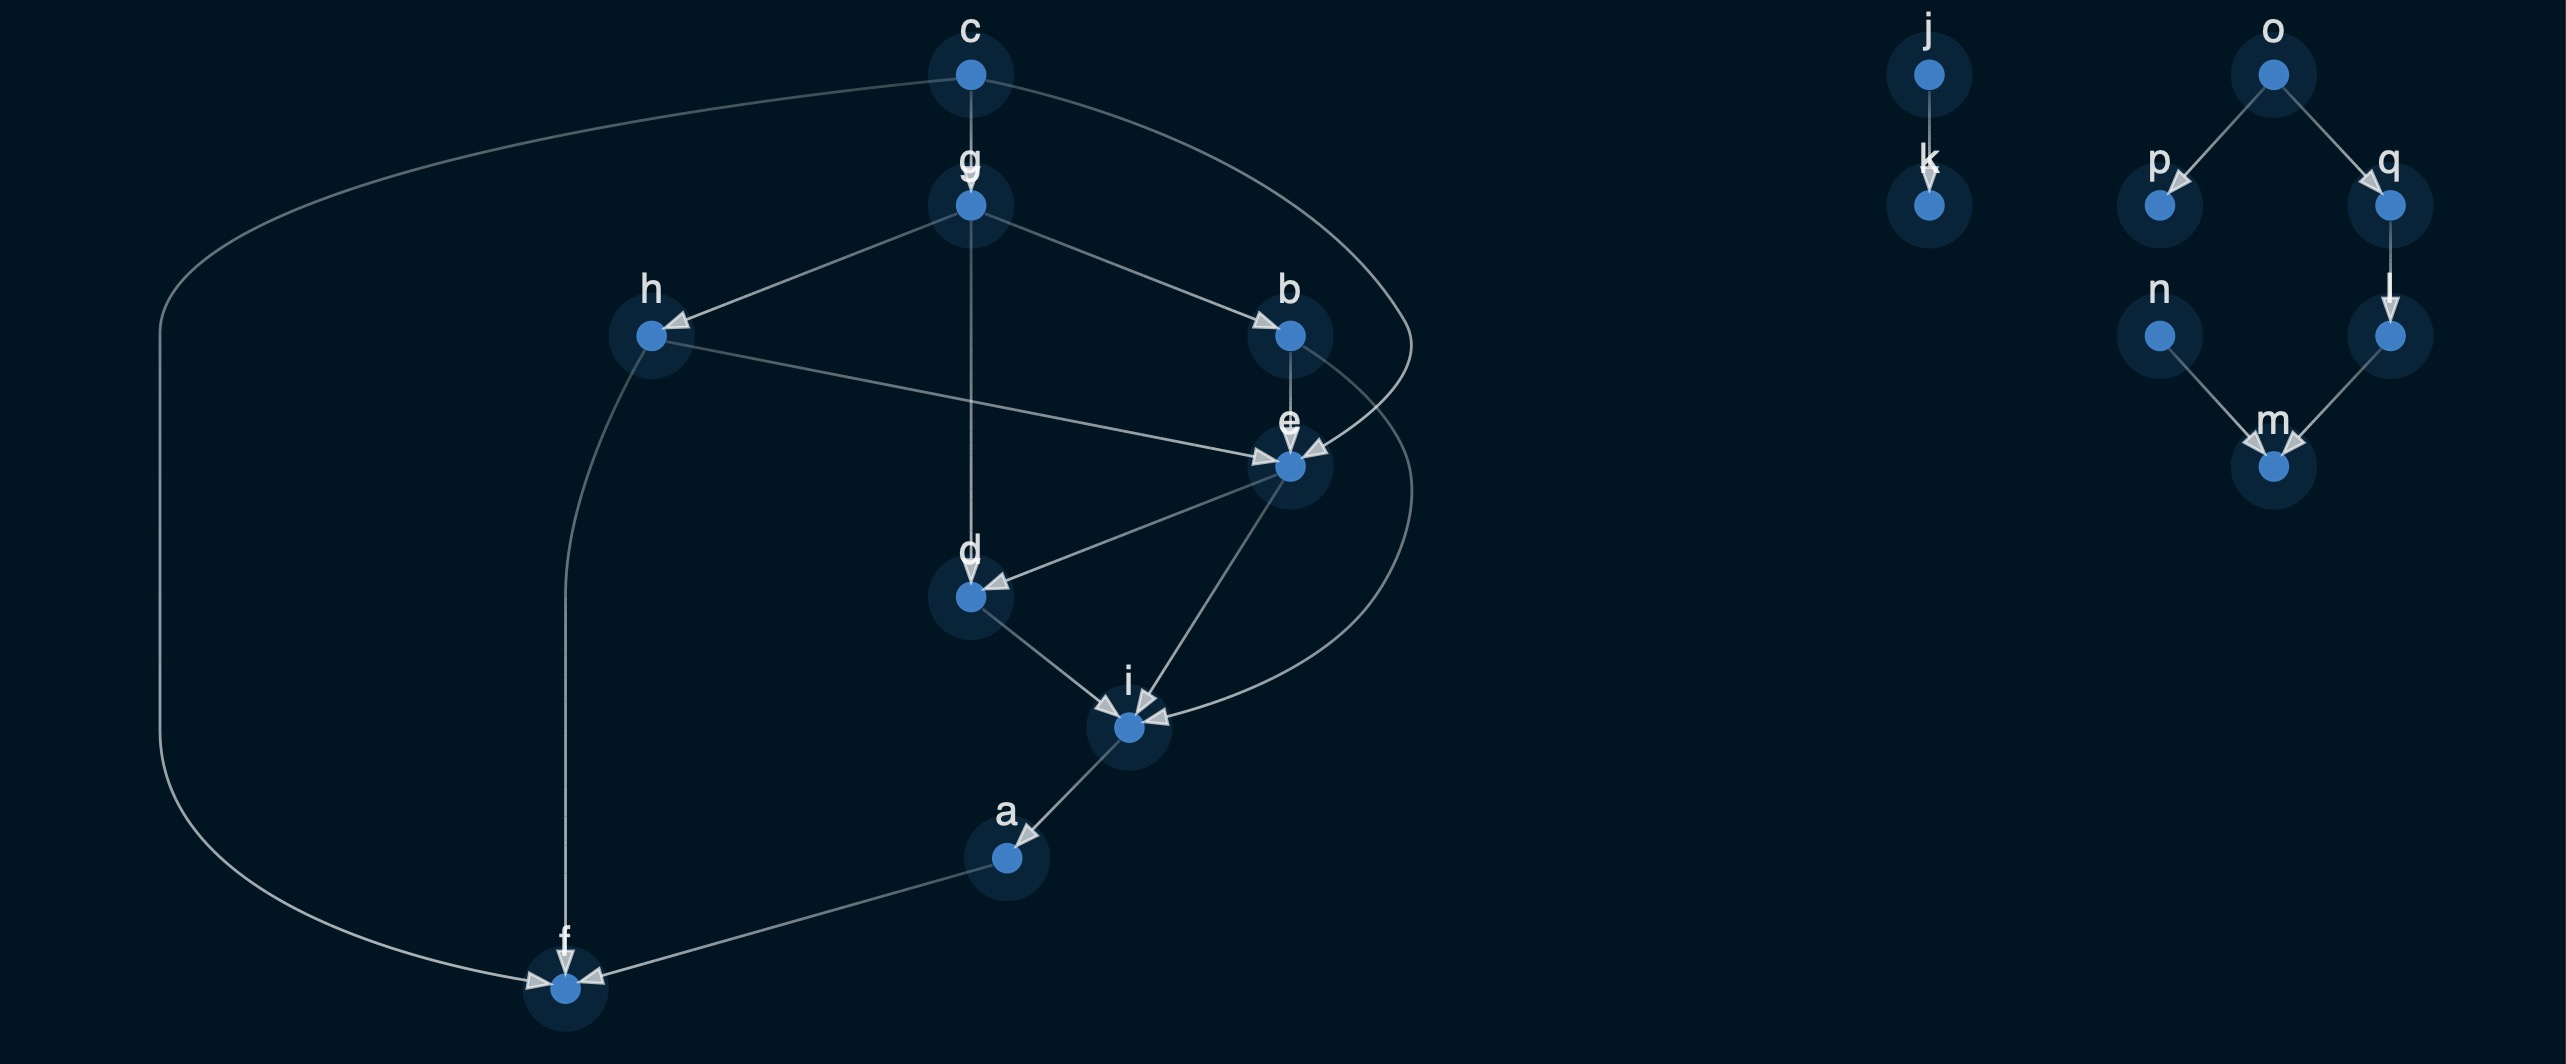

Graph with clusters and subgraphs added


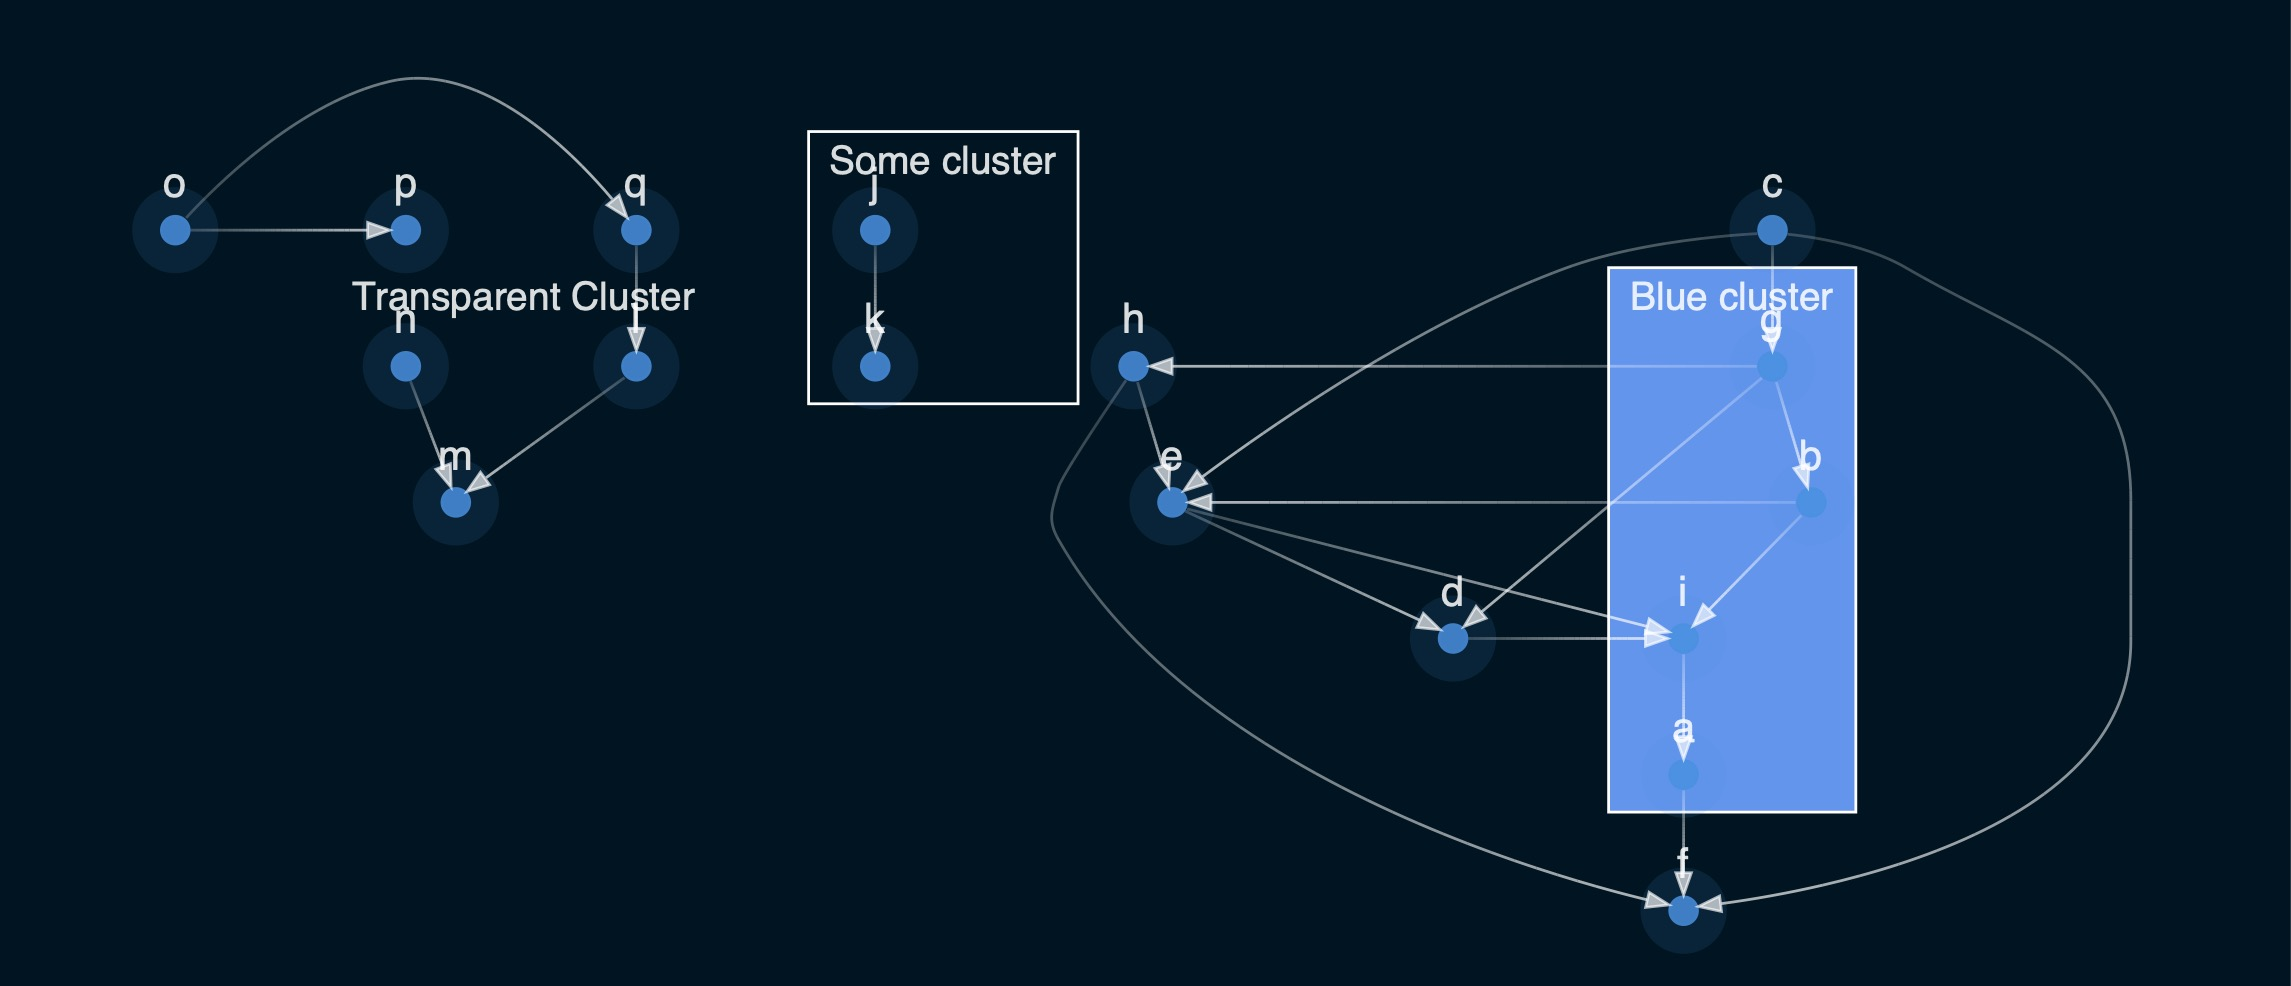

In [10]:
g_test = StructureModel(
    [
        ("g", "d"),
        ("h", "e"),
        ("g", "h"),
        ("e", "d"),
        ("c", "f"),
        ("h", "f"),
        ("b", "e"),
        ("a", "f"),
        ("i", "a"),
        ("d", "i"),
        ("c", "e"),
        ("c", "g"),
        ("e", "i"),
        ("g", "b"),
        ("d", "i"),
        ("b", "i"),
        ("j", "k"),
        ("l", "m"),
        ("n", "m"),
        ("n", "m"),
        ("o", "p"),
        ("o", "q"),
        ("q", "l"),
    ]
)

viz = plot_structure(
    g_test,
    prog="dot",
    graph_attributes={"dpi": 200, "nodesep": 1, "ranksep": ".5 equally"},
)

print("Graph with with no clusters")
display(Image(viz.draw(format="jpg")))


print("Graph with clusters and subgraphs added")
# This Subgraph sets the nodes 'o','p','q' to have the same rank, i.e. be on the same level
subgraph = viz.subgraph(["o", "p", "q"], name="same_level_subraph")
subgraph.graph_attr.update({"rank": "same"})
# This is a cluster, since the name starts with "cluster". Note the white retangular box around it
subgraph = viz.subgraph(["j", "k"], name="cluster_1", label="Some cluster")
subgraph.graph_attr.update({"color": "white"})
# A cluster with background color different from the rest of the graph
subgraph = viz.subgraph(["g", "b", "i", "a"], name="cluster2", label="Blue cluster")
subgraph.graph_attr.update({"color": "white", "bgcolor": "cornflowerblue"})
# Another cluster, this time transparent
subgraph = viz.subgraph(["l", "m", "n"], name="cluster3", label="Transparent Cluster")
subgraph.graph_attr.update({"color": "transparent"})

## It is important to run this before `draw` to get the desired effect
viz.layout("dot")  
display(Image(viz.draw(format="jpg")))


## Understand the engine used in `CausalNex` visualisations

The plots we have seen are all rendered by a software called `Graphviz`. The interface between `CausalNex` networks and this software is done by a Python package named `pygraphviz`.

### Understaning `Graphviz` 
`Graphviz` renders networks represented in a language called `dot`. An example of a simple network in `dot` format is shown bellow:

```dot
digraph G {
	graph [dpi=100];
    a [color=blue, shape=cylinder]
    a -> b[color=red];
    a -> c;
}
```

Once you have `Graphviz` installed, if we run the following command on the command line:

```shell
dot -Tjpg simple_graph.dot > output.jpg
```

The `dot` engine will render the graph below. 
We will obtain the following:

![a](./supporting_files/simple_graph.jpg)


We could also run for example:

```shell
neato -Tjpg simple_graph.dot > output.jpg
```

In which case we would obtain a `neato` style layout.

### How does this relate to `CausalNex`? 

When we run `plot_structure`, the network structure and attributes on the dictionaries (`graph_` `edge_` and `node_attributes`) are translated to `dot` language. This translation is done by `pygraphviz`.

### The role of `pygraphviz`

`plot_structure` returns a `pygraphviz` object (an `AGraph`) which internally stores a structure in `dot` format. If we'd like to see this structure, we can run
`viz.string()`

In [11]:
viz = plot_structure(g)
print(viz.string()[:470])

strict digraph "" {
	graph [bb="0,0,687.24,701.89",
		bgcolor="#001521",
		dpi=80,
		fontcolor="#FFFFFFD9",
		fontname=Helvetica,
		overlap=scale,
		pad="0.8,0.3",
		scale=2.0,
		splines=True
	];
	node [label="\N"];
	Age	[color="#4a90e220",
		fillcolor="#4a90e2d9",
		fixedsize=True,
		fontcolor="#FFFFFFD9",
		fontname=Helvetica,
		fontsize=15,
		height=0.15278,
		label="Age

 ",
		penwidth=20,
		pos="405.58,175.74",
		shape=circle,
		style=filled,
		width=0.15278];



This can be useful for verification purposes and to see default values of attributes.



## Alternative solutions

### Plotting with `networkx`

Since a `CausalNex`'s `StructureModel` is an extension of `networkx` graphs, we can easily use `networkx` to plot our structures.

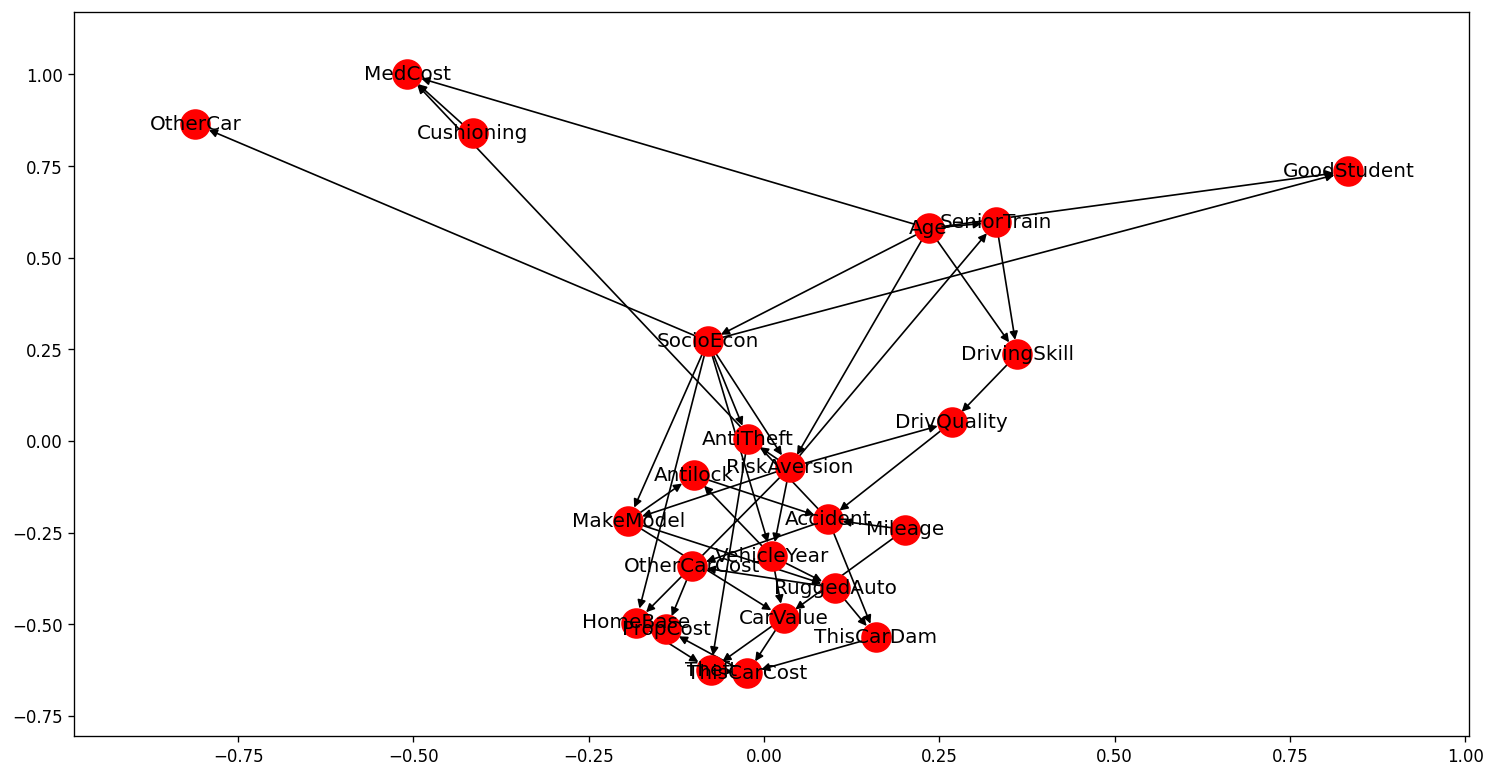

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(15, 8))  # set figsize
nx.draw_networkx(g)

Advantages of using `networkx`:

- Plotting with `networkx` can be much simpler since it uses `matplotlib` to create the graph. Anyone familiar with `matplotlib` can use it to customise the graph to his/her needs.
- We have much more control over the image since we have all `matplotlib` functionality available. We can, for example, easily change the positions of a node by hand.
- Documentation is more readable, since it is purely in Python.

Disadvantages:

- Features like splines on edges, gradient colored edges are not readily available in `networkx`.
- Layouts in `Graphviz` tend to produce better node positions. While `networkx` supports calling `Graphviz` to obtain positions, it can be inconvenient to pass all layout parameters (like `rankdir` `K` or `Damping`) through the API provided.
- `networkx` images may need fine tuning in the end.

We exemplify below how to obtain, with `networkx`, a similar to what we arrived with `plot_structure`.


Text(660, 650, 'The structure of our\n Insurance model')

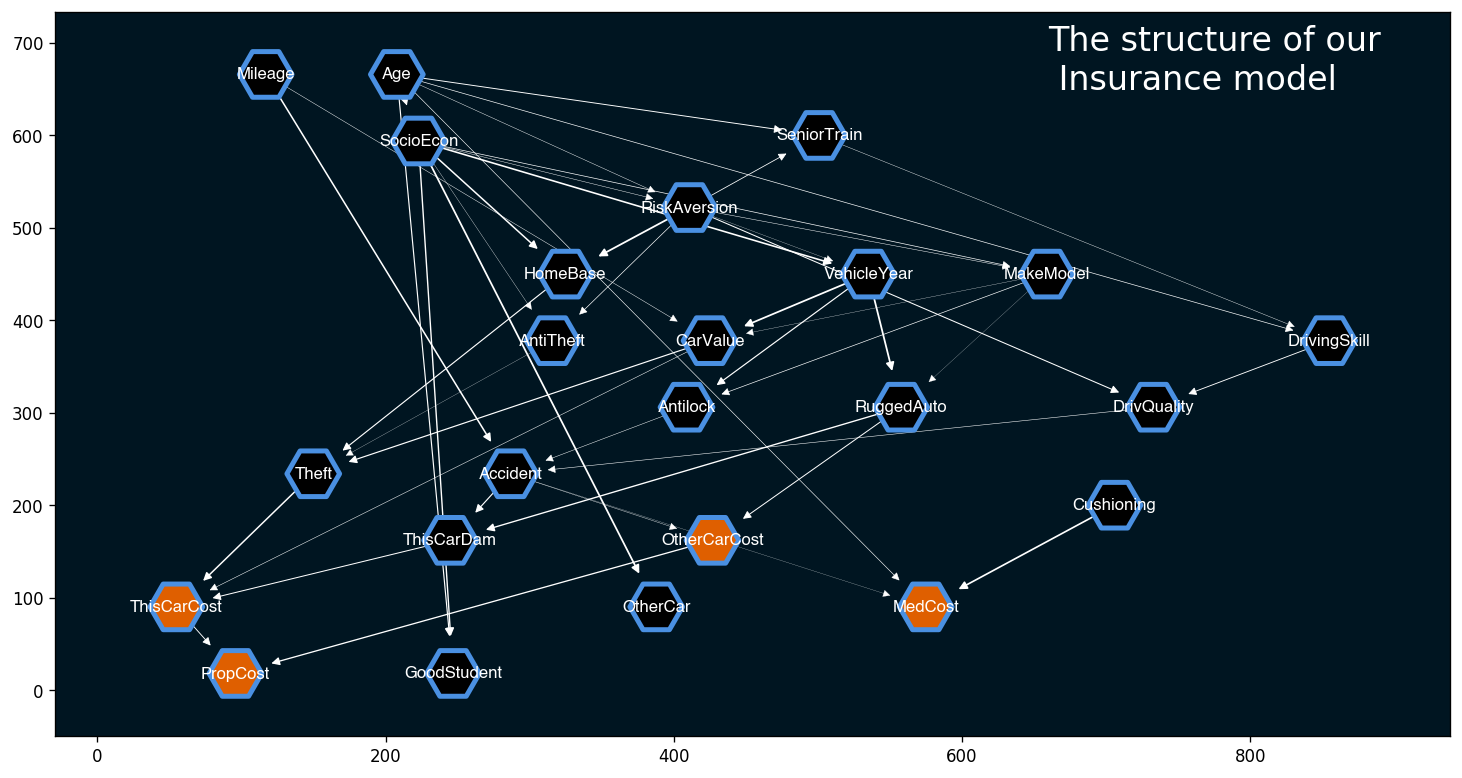

In [13]:
fig = plt.figure(figsize=(15, 8))  # set figsize
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#001521")  # set backgrount

### run a layout algorithm to set the position of nodes
# pos = nx.drawing.layout.circular_layout(g) # various layouts available
# pos = nx.drawing.layout.kamada_kawai_layout(g)
# pos = nx.drawing.layout.planar_layout(g)
# pos = nx.drawing.layout.random_layout(g)
# pos = nx.drawing.layout.rescale_layout(g)
# pos = nx.drawing.layout.shell_layout(g)
# pos = nx.drawing.layout.spring_layout(g)
# pos = nx.drawing.layout.spectral_layout(g)
# pos = nx.drawing.layout.spiral_layout(g)
# pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="dot")

# We can change the position of specific nodes
pos["Cushioning"] = (705.82, 200.0)
pos["SeniorTrain"] = (500.82, 600.0)

# add nodes to figure
nx.draw_networkx_nodes(
    g,
    pos,
    node_shape="H",
    node_size=1000,
    linewidths=3,
    edgecolors="#4a90e2d9",
    node_color=["black" if "Cost" not in el else "#DF5F00" for el in g.nodes],
)
# add labels
nx.draw_networkx_labels(
    g,
    pos,
    font_color="#FFFFFFD9",
    font_weight="bold",
    font_family="Helvetica",
    font_size=10,
)
# add edges
nx.draw_networkx_edges(
    g,
    pos,
    edge_color="white",
    node_shape="H",
    node_size=2000,
    node_color="black",
    width=[w + 0.1 for _, _, w, in g.edges(data="weight")],
)

plt.text(660, 650, "The structure of our\n Insurance model", color="white", size=20)


## References

[1] J. Binder, D. Koller, S. Russell, and K. Kanazawa. Adaptive Probabilistic Networks with Hidden Variables. Machine Learning, 29(2-3):213-244, 1997.)